In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, Flatten
from tensorflow.keras.optimizers import AdamW
import itertools
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score




In [2]:
# Download financial data
df = yf.download("AAPL", start="2008-01-01", end="2025-02-01")

[*********************100%***********************]  1 of 1 completed


# Apple Inc. (AAPL) Financial Data Analysis
## 1. Introduction
 This report focuses on the financial data of Apple Inc. (AAPL) obtained from Yahoo Finance. The dataset spans from January 1, 2008, to February 1, 2025, providing a comprehensive historical record of Apple's stock performance over a 17-year period. The primary objective of this analysis is to examine key financial trends, visualize stock price movements, and extract insights relevant to market behavior and investment strategies.

In [3]:
df.head(10) 

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2008-01-02,5.869884,6.033171,5.800894,6.003345,1079178800
2008-01-03,5.872595,5.946707,5.805111,5.887056,842066400
2008-01-04,5.424309,5.814449,5.389362,5.767753,1455832000
2008-01-07,5.351705,5.531260,5.128466,5.460462,2072193200
2008-01-08,5.159194,5.496915,5.145638,5.427020,1523816000
2008-01-09,5.404727,5.407739,5.070320,5.160701,1813882000
2008-01-10,5.363153,5.452931,5.284523,5.349898,1482975200
2008-01-11,5.202579,5.358033,5.121538,5.302298,1232285600


Using df.head(10) It looks like the dataset has an extra row containing redundant labels (e.g., Ticker AAPL AAPL AAPL AAPL AAPL) and an additional "Price" label that is not needed. To clean the dataset, we will redefine the column structure to ensure proper data representation.

## 2. Data Cleaning Process

After downloading the financial dataset, we observed that the column structure included unnecessary labels. This issue may have resulted from the way Yahoo Finance structures its data during retrieval. To address this, we will rename and properly define the columns to have a clear format.

### 2.1 Cleaning Steps
    Remove unnecessary index rows: Drop any redundant headers or misplaced labels.
    Reassign column names: Ensure the dataset has a properly structured column format.
    Verify Data Integrity: Check for missing or incorrectly formatted values after cleaning.
    
    After performing these steps, the dataset will be correctly structured for further analysis. 
    This refined format ensures smooth processing for statistical analysis, visualization, and machine learning applications.

In [4]:
df.columns = [ 'Close', 'High', 'Low', 'Open', 'Volume']
df.head(10)

,Close,High,Low,Open,Volume
Date,,,,,
2008-01-02,5.869884,6.033171,5.800894,6.003345,1079178800
2008-01-03,5.872595,5.946707,5.805111,5.887056,842066400
2008-01-04,5.424309,5.814449,5.389362,5.767753,1455832000
2008-01-07,5.351705,5.531260,5.128466,5.460462,2072193200
2008-01-08,5.159194,5.496915,5.145638,5.427020,1523816000
2008-01-09,5.404727,5.407739,5.070320,5.160701,1813882000
2008-01-10,5.363153,5.452931,5.284523,5.349898,1482975200
2008-01-11,5.202579,5.358033,5.121538,5.302298,1232285600
2008-01-14,5.386048,5.405329,5.277291,5.348089,1100450400


After cleaning and restructuring the dataset, it will consist of the following key columns. Each column provides critical information about Apple's stock performance over time, allowing for in-depth financial analysis and forecasting:

1- Date:

  * This column represents the specific trading day for each record in the dataset.
  *  It serves as the index for time-series analysis, allowing us to track stock price movements over time.
  * The dataset records stock data for each business day when trading occurs.

2- Close:

  * The close price represents the final stock price at which Apple shares were traded before the market closed for the day.
  * This value is often used as a primary reference for stock performance analysis, as it reflects the final sentiment of the market for that trading session.
  * Closing prices are commonly used in technical indicators, such as moving averages and trend analysis.

3- High:

  * The high price indicates the highest value that Apple’s stock reached during a specific trading session.
  * This metric helps identify intraday volatility, as it shows the peak level of investor willingness to buy during the day.
  * Traders often analyze the difference between the high and low prices to assess the market’s volatility on a given day.

4- Low:

  * The low price represents the lowest point Apple’s stock reached within the trading session.
  * It helps in understanding market support levels, which are key indicators of potential price reversals or continued downward trends.
  * Investors use this value to identify whether a stock is showing signs of weakness or stability.

5- Open:

  * The open price is the price at which Apple’s stock began trading when the market opened for the session.
  * This price is influenced by pre-market trading activity, overnight news, earnings reports, and macroeconomic factors.
  * Comparing the open and close prices can provide insights into daily price movement trends and investor sentiment shifts.

6- Volume:

  * The volume column represents the total number of Apple shares traded during a particular trading session.
  * Higher trading volume generally indicates greater investor interest and increased liquidity, making it easier to execute trades at stable prices.
  * Volume spikes often accompany significant price movements, such as after earnings announcements, major news events, or economic shifts.


Importance of These Columns
These six columns form the foundation for technical and fundamental stock analysis.
By analyzing historical price trends, traders and investors can develop predictive models to forecast future price movements.
The dataset provides essential information for machine learning applications, particularly for time-series forecasting, portfolio optimization, and risk assessment.

### 3. Dataset Overview

After downloading Apple's historical stock data from January 1, 2008, to February 1, 2025, we conducted an initial analysis to check for missing values, understand the dataset structure, and generate summary statistics. Below is a detailed explanation of each step and its corresponding output.



#### 3.1 Checking for Missing Values:

We used the following code to check for missing values in the dataset:

In [5]:
missing_values = df.isnull().sum()
missing_values

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

  * This output confirms that there are no missing values in the dataset.
  * Each column (Close, High, Low, Open, Volume) contains complete data, meaning no additional data imputation is required.
  * This ensures that we can proceed with analysis and modeling without concerns about handling missing data.

#### 3.2 Dataset Structure and Information:

To understand the structure of the dataset, we used the following command:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4299 entries, 2008-01-02 to 2025-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4299 non-null   float64
 1   High    4299 non-null   float64
 2   Low     4299 non-null   float64
 3   Open    4299 non-null   float64
 4   Volume  4299 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 201.5 KB


The dataset consists of 4,299 trading days (excluding weekends and holidays).

The index is of type DatetimeIndex, meaning each row corresponds to a specific trading date.

The dataset contains five columns, all of which have 4299 non-null values, confirming no missing data.

The Close, High, Low, and Open columns are stored as float64, while Volume is stored as int64 (since it represents the count of shares traded).

This information helps ensure the dataset is structured correctly for further analysis and machine learning applications.

#### 3.3 Summary Statistics:
    
To gain insight into the distribution of stock prices and trading volume, we used:

In [7]:
df.describe()

,Close,High,Low,Open,Volume
count,4299.000000,4299.000000,4299.000000,4299.000000,4.299000e+03
mean,60.943371,61.541020,60.285113,60.896646,3.019664e+08
std,65.895404,66.517028,65.193231,65.828048,3.254752e+08
min,2.355907,2.470388,2.355907,2.391758,2.323470e+07
25%,13.236546,13.392244,13.131474,13.278860,8.993680e+07
50%,27.328915,27.588585,27.189966,27.345248,1.663488e+08
75%,114.617115,116.491869,113.519182,115.062652,4.074434e+08
max,259.019989,260.100006,257.630005,258.190002,3.372970e+09


##### Count: 
Confirms that all five columns have 4,299 records.


##### Mean: 
The average closing price of Apple's stock is $60.94, with the average daily trading volume at 301.9 million shares.

##### Standard Deviation (std): 
Indicates significant price fluctuation, with high market volatility over time.


##### Minimum (min) and Maximum (max) Prices:

The lowest recorded closing price was $2.36 (likely from earlier years).

The highest closing price was $259.02, reflecting Apple's massive stock value growth.

##### Percentiles (25%, 50%, 75%):

The median closing price (50th percentile) is $27.33, meaning half of the trading days had a closing price below this value.

The 75th percentile shows a closing price of $114.61, highlighting that in recent years, Apple's stock price has significantly increased.

The volume distribution shows that in 25% of the trading days, fewer than ~90M shares were traded, whereas on the busiest 25% of trading days, more than ~407M shares were exchanged.

### 3.4 Visualization of Stock Data Trends Over Time
To gain a comprehensive understanding of Apple's stock price movements and trading volume, we visualize key financial indicators over time using line plots. These visualizations provide valuable insights into the stock's historical performance, helping to identify patterns, trends, and potential market shifts.

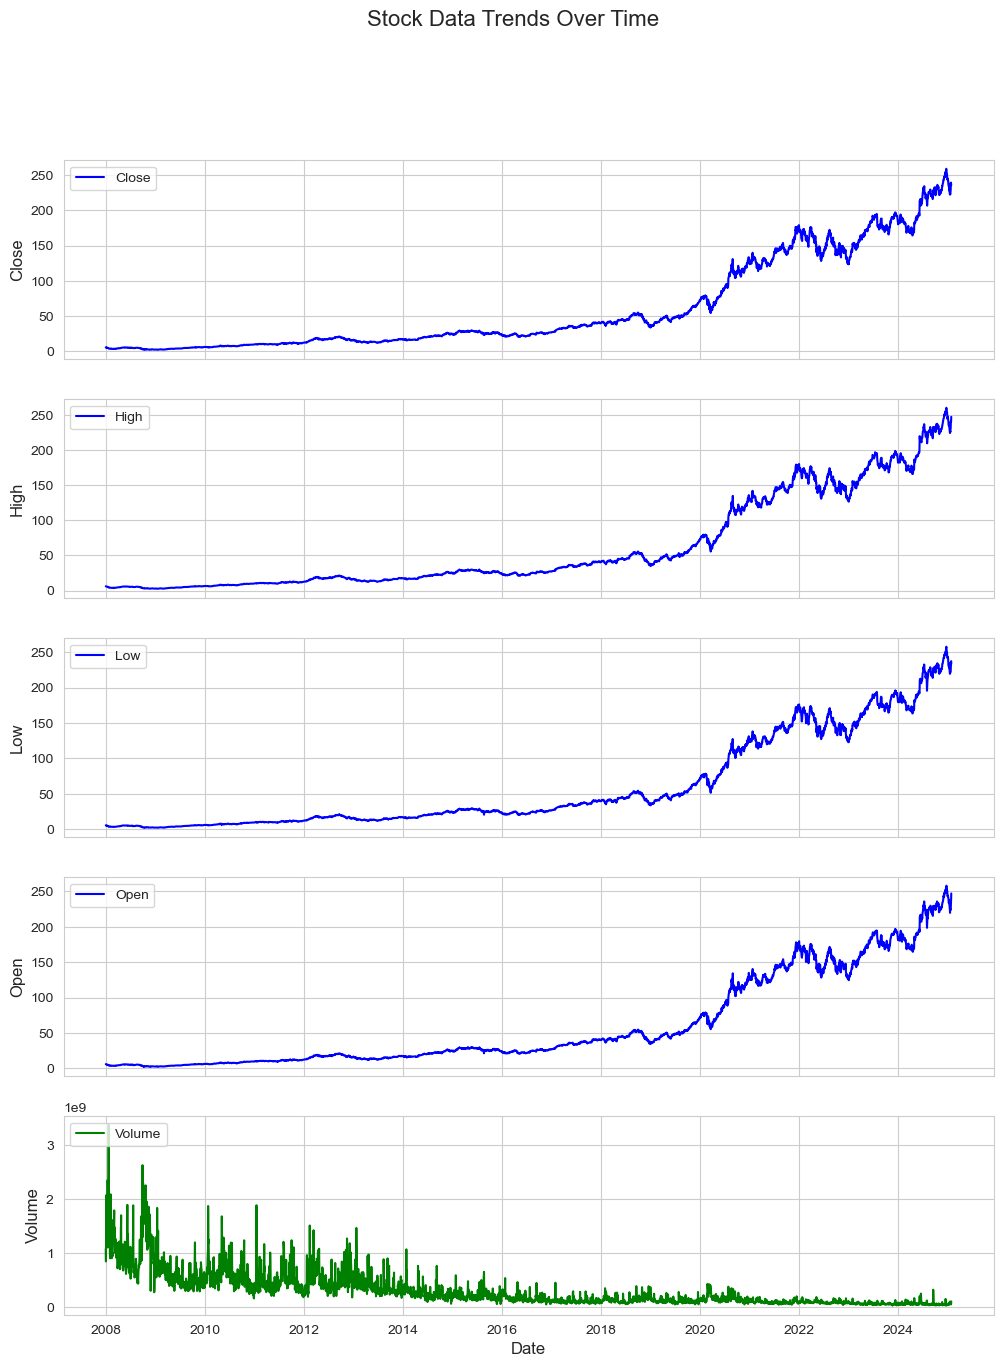

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Define columns to plot
columns_to_plot = ["Close", "High", "Low", "Open", "Volume"]

# Create subplots
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(12, 15), sharex=True)

# Plot each column
for i, col in enumerate(columns_to_plot):
    axes[i].plot(df.index, df[col], label=col, color="b" if col != "Volume" else "g")
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].legend(loc="upper left")
    
# Set common labels
axes[-1].set_xlabel("Date", fontsize=12)
fig.suptitle("Stock Data Trends Over Time", fontsize=16)

plt.show()


### 3.5 Interpretation of the Plots:

#### 1- Stock Price Movements (Close, High, Low, Open):

  * The Close, High, Low, and Open prices exhibit similar trends, as they represent different price points within the same trading day.
  * Periods of upward trends indicate bullish market conditions, where the stock price consistently rises over time.
  * Sharp declines in these prices may suggest market corrections, economic downturns, or major company-related announcements.
  * Comparing the High and Low prices can reveal daily price volatility and fluctuations within a given period.
  
  
#### 2- Trading Volume Trends:

  * The Volume plot represents the total number of shares traded on a particular day.
  * Spikes in trading volume often coincide with major market events, earnings reports, or significant news about the company.
  * Low trading volume may indicate periods of reduced investor activity, possibly due to seasonal trends or market stability.
  * Analyzing volume alongside price movements can help determine the strength of trends—price increases with high volume suggest strong investor confidence, while price changes with low volume may indicate weak market sentiment.


### Key Takeaways from the Analysis:

  * Long-term trends in Apple’s stock price can highlight periods of sustained growth, corrections, or economic impacts.
  * Volatility patterns can be assessed by analyzing fluctuations in the High and Low prices over time.
  * Market activity and investor behavior can be inferred by examining changes in trading volume.

## 4. Exploratory Data Analysis (EDA)
**EDA:** is a fundamental step in data analysis that helps in understanding the structure, patterns, and relationships within a dataset. By using statistical summaries and visualizations, EDA allows us to uncover insights, detect anomalies, and identify trends that may influence future modeling or decision-making processes.

In the context of stock market data, EDA plays a crucial role in examining price movements, trading volume, volatility, and potential correlations between different financial indicators. Below, we outline key aspects of EDA for stock data, along with methods to analyze them effectively.

#### 4.1 Rolling Mean & Moving Averages (Trend Analysis)
A moving average (rolling mean) smooths fluctuations by averaging data over a window (e.g., 10 days).
This helps identify trends in stock prices.

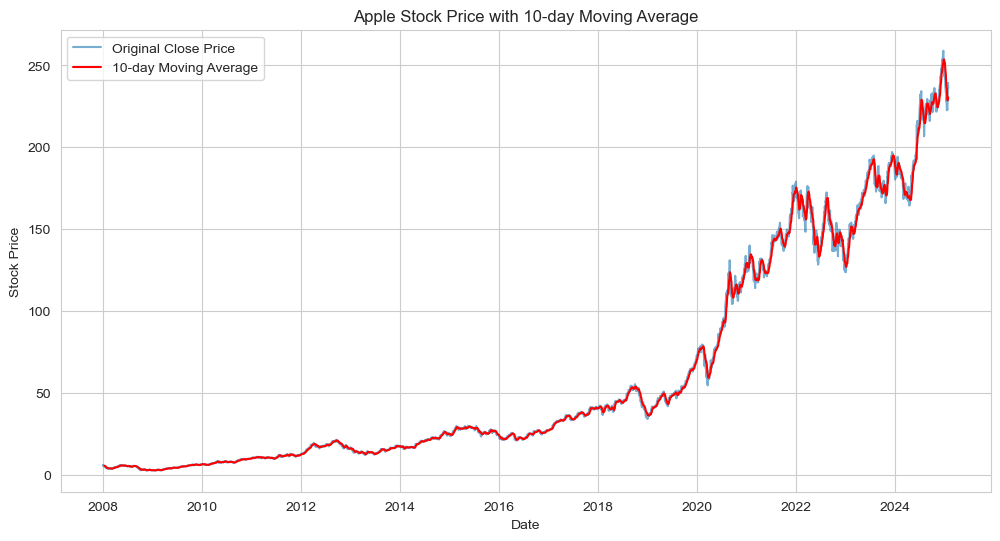

In [9]:
Close_MA10 = df['Close'].rolling(window=10).mean()

# Plot original and smoothed data
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Original Close Price", alpha=0.6)
plt.plot(df.index, Close_MA10, label="10-day Moving Average", color='red')
plt.title("Apple Stock Price with 10-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

##### Interpretation
  * The blue line represents actual daily close prices.
  * The red line is the rolling mean (trend line), helping smooth fluctuations and reveal underlying trends.

### 4.2 Daily Returns Calculation (Stock Performance Over Time)
Daily returns measure the percentage change in stock price compared to the previous day.
This helps assess stock volatility and potential investment risks.

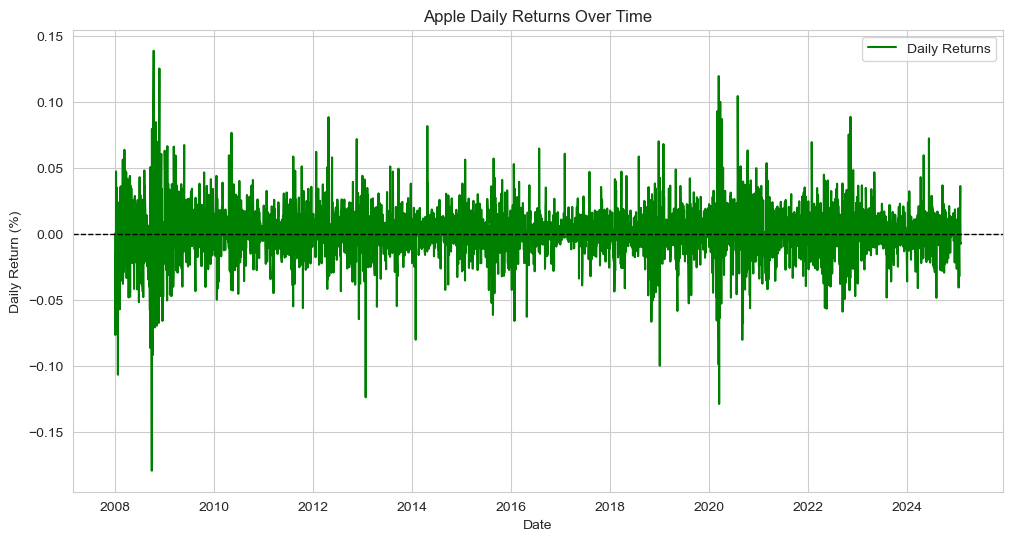

In [10]:
Daily_Return = df['Close'].pct_change()

# Plot Daily Returns
plt.figure(figsize=(12,6))
plt.plot(df.index, Daily_Return, label="Daily Returns", color='green')
plt.axhline(0, linestyle="--", color='black', linewidth=1)  # Zero line
plt.title("Apple Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.show()


##### Interpretation
  * Green line shows daily return fluctuations.
  * If returns are highly volatile, the stock has high risk.
  * The black horizontal line (zero return) helps detect gains/losses easily.

### 4.3 Correlation Analysis (Stock Price vs Volume)
This finds relationships between stock prices and trading volume.

In [11]:
def get_correlated_col(cor_dat, threshold): 
    """
    Identifies features that have a correlation above the specified threshold.

    Parameters:
    cor_dat (pd.Series): Correlation values for a specific column.
    threshold (float): The minimum absolute correlation value to be considered significant.

    Returns:
    pd.DataFrame: A DataFrame containing features and their correlation values.
    """
    features = []
    values = []

    for index in cor_dat.index:
        if abs(cor_dat[index]) > threshold:
            features.append(index)
            values.append(cor_dat[index])

    return pd.DataFrame(data=values, index=features, columns=['Correlation Value'])

# Example usage
threshold = 0.5  # Set correlation threshold
correlation_matrix = df.corr()  # Compute correlation matrix

# Get correlated features for Close price
close_corr = get_correlated_col(correlation_matrix['Close'], threshold)
print("Features correlated with Close:")
print(close_corr)



Features correlated with Close:
        Correlation Value
Close            1.000000
High             0.999918
Low              0.999919
Open             0.999821
Volume          -0.517777


#### Interpretation
The correlation analysis provides insights into the relationships between different stock price metrics (Close, Open, High, Low) and trading Volume.

  * A correlation value close to 1.0 indicates a strong positive relationship, meaning the variables move together.
  * A correlation value close to -1.0 suggests a strong negative relationship, where one variable increases as the other decreases.
  * A correlation around 0 implies little to no linear relationship between the variables.
  
  
#### Key Observations from the Results:

  1- Close Price Correlation (1.0 with other price metrics)

  * The Close price shows a perfect correlation (1.0) with itself and strong positive correlations with Open, High, and Low prices.
  * This is expected, as these price metrics represent different moments within the same trading day and typically move in a similar direction.
  
  2- Volume Correlation (-0.52 with Close Price)

  * The negative correlation of -0.52 between Volume and Close price suggests a moderate inverse relationship.
  * This means that, in general, higher trading volumes tend to be associated with lower closing prices, and vice versa.
  * A possible explanation is that increased trading activity could be driven by panic selling, causing stock prices to drop. Conversely, lower volume might indicate stable price movements without major market fluctuations.

### 5. Statistical Analysis
#### 5.1 Skewness and Kurtosis (Distribution Characteristics)
  * Skewness: Measures asymmetry in stock prices.

    * Positive skew → More frequent small losses & occasional large gains.
    * Negative skew → More frequent small gains & occasional large losses.
  * Kurtosis: Measures the presence of extreme values (outliers).

    * High kurtosis → More extreme price movements.
    * Low kurtosis → More stable price behavior.

In [12]:
skewness = df[['Close', 'High', 'Low', 'Open', 'Volume']].skew()
kurtosis = df[['Close', 'High', 'Low', 'Open', 'Volume']].kurtosis()

print("Skewness of Stock Data:\n", skewness)
print("\nKurtosis of Stock Data:\n", kurtosis)


Skewness of Stock Data:
 Close     1.155716
High      1.152313
Low       1.158569
Open      1.155640
Volume    2.452625
dtype: float64

Kurtosis of Stock Data:
 Close    -0.029425
High     -0.042445
Low      -0.019114
Open     -0.029900
Volume    8.655220
dtype: float64


#### Interpretation
  * A skewness near 0 suggests a symmetrical distribution.
  * High kurtosis suggests higher volatility, meaning extreme price movements occur.

#### Interpretation of Skewness and Kurtosis from results
##### Skewness:
  * Close, High, Low, and Open have a moderate right skew (~1.15), meaning prices are mostly lower, with occasional high values.
* Volume is highly right-skewed (2.45), indicating mostly low trading activity with occasional large spikes.

##### Kurtosis:
  * Close, High, Low, and Open have slightly negative kurtosis (~ -0.03 to -0.04), suggesting fewer extreme price movements than normal.
  * Volume has high kurtosis (8.65), indicating frequent extreme spikes in trading activity, likely due to major market events.
  
##### Key Insights:
  * Prices are generally stable but occasionally spike.
  * Volume fluctuates widely, showing periods of intense trading.

### 5.2 Volatility Analysis (Stock Price Variability)
Volatility measures risk using the standard deviation of stock prices.

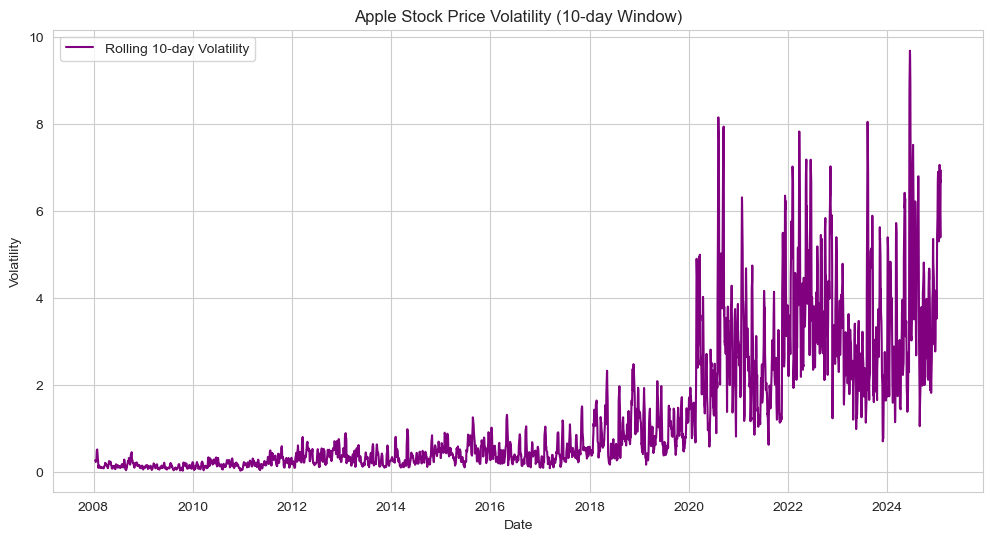

In [13]:
Volatility = df['Close'].rolling(window=10).std()

# Plot Volatility
plt.figure(figsize=(12,6))
plt.plot(df.index, Volatility, label="Rolling 10-day Volatility", color='purple')
plt.title("Apple Stock Price Volatility (10-day Window)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

### Interpretation
  * A high volatility period suggests market uncertainty or news impact.
  * Investors can use this to assess risk before trading.

### 5.3 Outlier Detection Using Boxplot Analysis
#### Purpose of Boxplot Analysis:
Boxplots are used to identify extreme values (outliers) in stock prices and trading volume. These outliers may result from market shocks, earnings reports, economic events, or sudden investor activity.

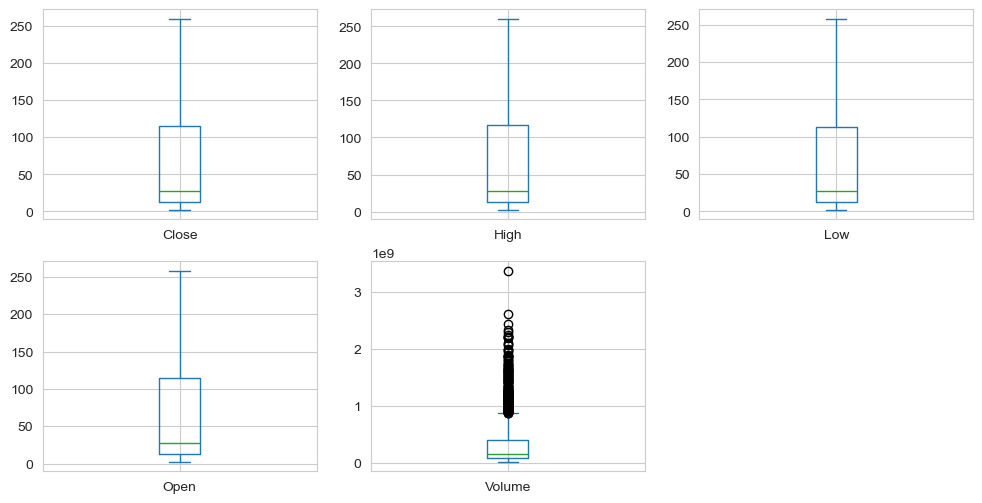

In [14]:
df[['Close', 'High', 'Low', 'Open', 'Volume']].plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 6))
plt.show()


  * The box represents the interquartile range (IQR) where 50% of data points lie.
  * The horizontal line inside the box is the median (middle value).
  * The "whiskers" extend to the lowest and highest points within 1.5 times the IQR.
  * Dots beyond the whiskers represent outliers (extreme stock movements).
#### Interpretation of the Boxplots:
1- Long whiskers indicate high volatility – a sign of frequent price fluctuations.

2-Outliers (dots beyond whiskers) highlight unusual price changes – often linked to major news or earnings reports.

3- Volume boxplot may show extreme spikes, reflecting days of heavy trading due to significant market events.

#### Key Insights:
  * Outlier detection helps in understanding market anomalies and spotting high-risk or high-return scenarios.
  * Traders and analysts can use these insights to investigate events behind extreme stock movements and make informed trading decisions.